<a href="https://colab.research.google.com/github/mshahzaib101/Dogs_vs_Cats_Kaggle/blob/master/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload() #kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mshahzaibshoaib","key":"f05fea36e5f0bc786d563539d1aabae3"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-17 22:02:37          55431  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           4794  
praveengovi/coronahack-chest-xraydataset                       CoronaHack -Chest X-Ray-Dataset                       1GB  2020-03-20 01:26:40           1076  
katerpillar/meteonet                                           MeteoNet North-West France                           11GB  2020-04-16 08:35:45             84  
andrewmvd/covid19-ct-scans                    

### Download Data
! kaggle competitions download -c 'name-of-competition'

Use unzip command to unzip the data:

For example,

Create a directory named train,

! mkdir train

unzip train data there,

! unzip train.zip -d train

In [4]:
! kaggle competitions download -c dogs-vs-cats

100% 271M/271M [00:05<00:00, 65.6MB/s]
100% 271M/271M [00:05<00:00, 55.9MB/s]
 97% 528M/543M [00:07<00:00, 89.3MB/s]
100% 543M/543M [00:07<00:00, 71.6MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 90.6MB/s]


In [0]:
! mkdir data

In [6]:
! unzip train.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/train/dog.55.jpg   
  inflating: data/train/dog.550.jpg  
  inflating: data/train/dog.5500.jpg  
  inflating: data/train/dog.5501.jpg  
  inflating: data/train/dog.5502.jpg  
  inflating: data/train/dog.5503.jpg  
  inflating: data/train/dog.5504.jpg  
  inflating: data/train/dog.5505.jpg  
  inflating: data/train/dog.5506.jpg  
  inflating: data/train/dog.5507.jpg  
  inflating: data/train/dog.5508.jpg  
  inflating: data/train/dog.5509.jpg  
  inflating: data/train/dog.551.jpg  
  inflating: data/train/dog.5510.jpg  
  inflating: data/train/dog.5511.jpg  
  inflating: data/train/dog.5512.jpg  
  inflating: data/train/dog.5513.jpg  
  inflating: data/train/dog.5514.jpg  
  inflating: data/train/dog.5515.jpg  
  inflating: data/train/dog.5516.jpg  
  inflating: data/train/dog.5517.jpg  
  inflating: data/train/dog.5518.jpg  
  inflating: data/train/dog.5519.jpg  
  inflating: data/train/dog.552.jpg  
  inflating: data

## Preparing Data

In [0]:
train_data_path_cats = 'train_data/cats'
train_data_path_dogs = 'train_data/dogs'

test_data_path_cats = 'test_data/cats'
test_data_path_dogs = 'test_data/dogs'

valid_data_path_cats = 'validation/cats'
valid_data_path_dogs = 'validation/dogs'

In [0]:
! mkdir train_data
! mkdir test_data
! mkdir validation

! mkdir train_data/cats
! mkdir train_data/dogs
! mkdir test_data/cats
! mkdir test_data/dogs
! mkdir validation/cats
! mkdir validation/dogs

In [0]:
import os, shutil

In [0]:
#train data for cats
fnames = ['cat.{}.jpg'.format(i) for i in range(8500)]
for fname in fnames:
  src = os.path.join("data/train",fname)
  dst = os.path.join(train_data_path_cats,fname)
  shutil.copyfile(src, dst)

#train data for dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(8500)]
for fname in fnames:
  src = os.path.join("data/train",fname)
  dst = os.path.join(train_data_path_dogs,fname)
  shutil.copyfile(src, dst)

#test data for cats
fnames = ['cat.{}.jpg'.format(i) for i in range(11000, 12500)]
for fname in fnames:
  src = os.path.join("data/train",fname)
  dst = os.path.join(test_data_path_cats,fname)
  shutil.copyfile(src, dst)

#test data for dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(11000, 12500)]
for fname in fnames:
  src = os.path.join("data/train",fname)
  dst = os.path.join(test_data_path_dogs,fname)
  shutil.copyfile(src, dst)

#validation data for cats
fnames = ['cat.{}.jpg'.format(i) for i in range(8500, 11000)]
for fname in fnames:
  src = os.path.join("data/train",fname)
  dst = os.path.join(valid_data_path_cats,fname)
  shutil.copyfile(src, dst)

#validation data for dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(8500, 11000)]
for fname in fnames:
  src = os.path.join("data/train",fname)
  dst = os.path.join(valid_data_path_dogs,fname)
  shutil.copyfile(src, dst)

In [11]:
print('total traning cats images',len(os.listdir(train_data_path_cats)))
print('total traning dogs images',len(os.listdir(train_data_path_dogs)))

print('total testing cats images',len(os.listdir(test_data_path_cats)))
print('total testing dogs images',len(os.listdir(test_data_path_dogs)))

print('total validation cats images',len(os.listdir(valid_data_path_cats)))
print('total validation dogs images',len(os.listdir(valid_data_path_dogs)))

total traning cats images 8500
total traning dogs images 8500
total testing cats images 1500
total testing dogs images 1500
total validation cats images 2500
total validation dogs images 2500


In [13]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train_data',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 17000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Model 1

In [14]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [16]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100, validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 105s 1s/step - loss: 0.6885 - acc: 0.5530 - val_loss: 0.7043 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 103s 1s/step - loss: 0.6642 - acc: 0.5855 - val_loss: 0.6100 - val_acc: 0.6890
Epoch 3/100
100/100 [==============================] - 103s 1s/step - loss: 0.6408 - acc: 0.6410 - val_loss: 0.5279 - val_acc: 0.6890
Epoch 4/100
100/100 [==============================] - 104s 1s/step - loss: 0.6031 - acc: 0.6685 - val_loss: 0.7540 - val_acc: 0.6860
Epoch 5/100
100/100 [==============================] - 103s 1s/step - loss: 0.5983 - acc: 0.6650 - val_loss: 0.6144 - val_acc: 0.6970
Epoch 6/100
100/100 [==============================] - 107s 1s/step - loss: 0.5866 - acc: 0.6820 - val_loss: 0.4782 - val_acc: 0.7140
Epoch 7/100
100/100 [==============================] - 104s 1s/step - loss: 0.5816 - acc: 0.6835 - val_loss: 0.6147 - val_acc: 0.7370
Epoch 8/100
100/100 [==============================] - 103s 1s

In [19]:
#connecting gdrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#for listing drive content
os.listdir('/content/drive/My Drive/DeepLearning')
model.save('/content/drive/My Drive/DeepLearning/dog_vs_cat_kaggle/cats_and_dogs_1-1.h5')

In [17]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

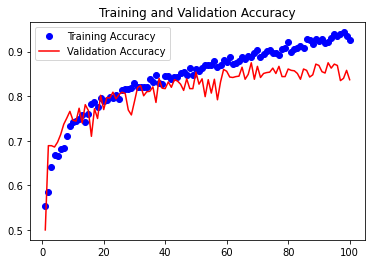

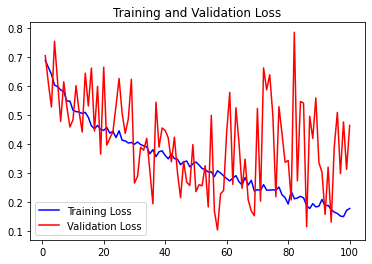

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Model 2

In [14]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train_data',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/validation',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 17000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=500, validation_data=validation_generator,validation_steps=50)

Epoch 1/500
100/100 [==============================] - 181s 2s/step - loss: 0.6960 - acc: 0.5084 - val_loss: 0.6858 - val_acc: 0.4994
Epoch 2/500
100/100 [==============================] - 176s 2s/step - loss: 0.6832 - acc: 0.5447 - val_loss: 0.6832 - val_acc: 0.5462
Epoch 3/500
100/100 [==============================] - 179s 2s/step - loss: 0.6767 - acc: 0.5797 - val_loss: 0.6956 - val_acc: 0.5781
Epoch 4/500
100/100 [==============================] - 176s 2s/step - loss: 0.6653 - acc: 0.5888 - val_loss: 0.6034 - val_acc: 0.6434
Epoch 5/500
100/100 [==============================] - 177s 2s/step - loss: 0.6557 - acc: 0.6028 - val_loss: 0.6018 - val_acc: 0.6550
Epoch 6/500
100/100 [==============================] - 177s 2s/step - loss: 0.6467 - acc: 0.6259 - val_loss: 0.5341 - val_acc: 0.6294
Epoch 7/500
100/100 [==============================] - 179s 2s/step - loss: 0.6462 - acc: 0.6209 - val_loss: 0.5961 - val_acc: 0.6669
Epoch 8/500
100/100 [==============================] - 177s 2s

In [0]:
#connecting gdrive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
#for listing drive content
os.listdir('/content/drive/My Drive/DeepLearning')
model.save('/content/drive/My Drive/DeepLearning/dog_vs_cat_kaggle/cats_and_dogs_2-1.h5')

In [1]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

NameError: ignored